In [ ]:
import pandas as pd
import numpy as np

#train test split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#normalizing dataset
from sklearn.preprocessing import StandardScaler

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
#plt.style.use('seaborn-poster')

#sns.set_style('darkgrid')


#saving/loading data
import pickle

#Evaluating models
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, auc,roc_auc_score, roc_curve, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.utils import class_weight

#logistic regression
from sklearn.linear_model import LogisticRegression

#Decision trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#PCA
from sklearn.decomposition import PCA

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Machine
from sklearn.svm import SVC

#Esemble boosting methods
from sklearn.ensemble import  GradientBoostingClassifier

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#XGboost
import xgboost as xgb
from xgboost import XGBClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data -DSfB/final_df.csv')
df.head()

,ct_cust_it,duration_days,avg_order_quantity,avg_price_cust,ct_cp_used_cust,ct_brands,avg_cp_discount,avg_total_discount,ct_cat,ct_items_cust,...,family_size_2,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,redemption_status
0,2403.0,-12,1.169768,184.260484,1.0,2,-1.241694,-52.974000,1,310,...,0,0,0,0,1,0,0,0,0,0
1,61.0,-12,1.050926,234.247013,12.0,1,0.000000,-10.661343,1,385,...,1,0,0,1,0,0,0,1,0,0
2,118.0,31,1.353802,121.094495,85.0,1,-2.987321,-145.485813,1,970,...,1,0,0,0,1,0,0,1,0,0
3,14.0,-12,1.110390,98.276034,2.0,1,-4.452500,-9.463101,1,237,...,0,0,0,0,0,0,0,0,0,0
4,874.0,77,1.071044,120.636103,10.0,1,-0.198055,-33.827176,1,562,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
df.shape

(77524, 40)

In [ ]:
df.columns

Index(['ct_cust_it', 'duration_days', 'avg_order_quantity', 'avg_price_cust',
       'ct_cp_used_cust', 'ct_brands', 'avg_cp_discount', 'avg_total_discount',
       'ct_cat', 'ct_items_cust', 'avg_quantity_cust', 'avg_price',
       'income_bracket', 'avg_oth_discount_cust', 'rented',
       'mode_cat_Dairy, Juices & Snacks', 'mode_cat_Flowers & Plants',
       'mode_cat_Grocery', 'mode_cat_Meat', 'mode_cat_Natural Products',
       'mode_cat_Packaged Meat', 'mode_cat_Pharmaceutical',
       'mode_cat_Prepared Food', 'mode_cat_Seafood',
       'mode_cat_Skin & Hair Care', 'no_of_children_1', 'no_of_children_2',
       'no_of_children_3+', 'brand_type_Established', 'campaign_type_Y',
       'family_size_2', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'marital_status_Married', 'marital_status_Single',
       'redemption_status'],
      dtype='object')

In [ ]:
X = df.loc[:, df.columns != 'redemption_status']
Y = df['redemption_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size = 0.3 ,random_state=42)

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
def plot_2d_space(X, y, label='Classes', title='x', xlabel='x', ylabel='y'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, s=2
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')

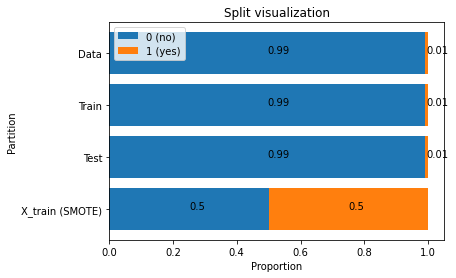

In [ ]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = Y.value_counts() / len(Y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

In [ ]:
scaler = StandardScaler()
scaled_X_sm = scaler.fit_transform(X_sm)
scaled_X_test = scaler.transform(X_test)

In [ ]:
names = ["Logistic_Regression","Nearest_Neighbors", "SVM", "Gaussian Naive_Bayes", "XGB" , "Decision_Tree", "Random_Forest"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=15),
    SVC(probability=True),
    GaussianNB(),
    XGBClassifier(),
    DecisionTreeClassifier(criterion = "gini", random_state = 100,
                           max_depth=3, min_samples_leaf=3),
    RandomForestClassifier(max_depth=5, n_estimators=100)
    ]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class meth

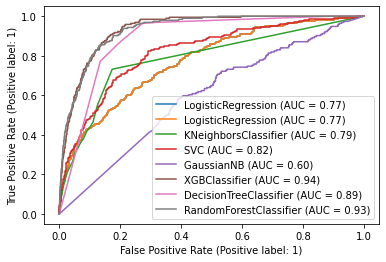

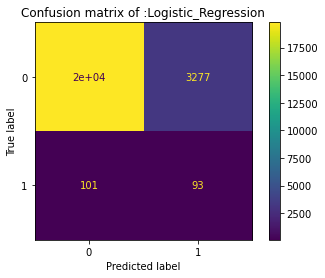

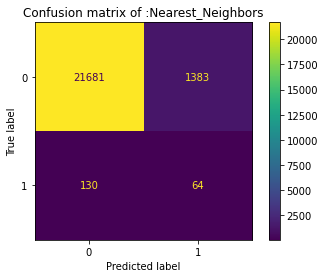

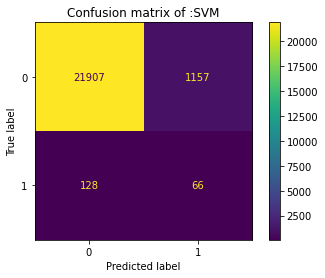

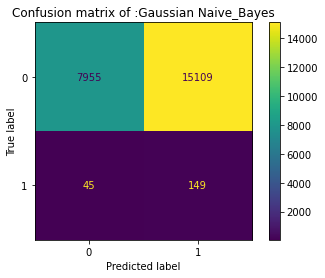

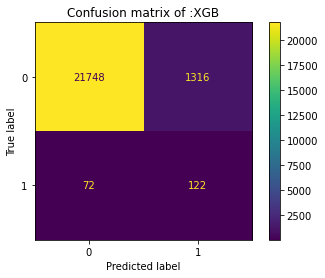

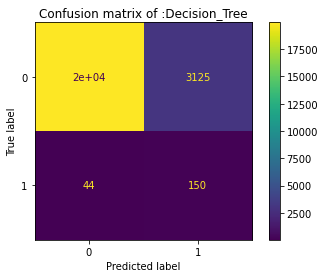

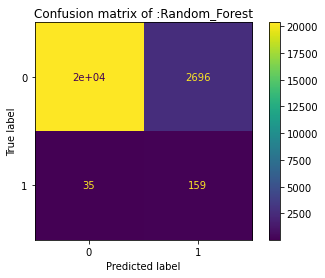

In [ ]:
scores = []
fscores = []
precisions = []
recalls = []
disp = plot_roc_curve(LogisticRegression().fit(scaled_X_sm, y_sm), scaled_X_test, y_test)
for name, clf in zip(names, classifiers):
    clf.fit(scaled_X_sm, y_sm)
    y_pred = clf.predict(scaled_X_test)

    score = clf.score(scaled_X_test, y_test)
    scores.append(score)

    precision = precision_score(y_test, y_pred)
    precisions.append(precision)

    recall = recall_score(y_test, y_pred)
    recalls.append(recall)


    fscore = f1_score(y_test, y_pred)
    fscores.append(fscore) 
    
    plot_confusion_matrix(clf, scaled_X_test, y_test)  
    plt.title('Confusion matrix of :'+ name)
    #plt.show()
    plot_roc_curve(clf, scaled_X_test, y_test, ax=disp.ax_)

In [17]:
models = pd.DataFrame()
models['model'] = names
models['accuracy'] = scores
models

,model,accuracy
0,Logistic_Regression,0.854760
1,Nearest_Neighbors,0.934947
2,SVM,0.944750
3,Gaussian Naive_Bayes,0.348439
4,XGB,0.940322
5,Decision_Tree,0.863746
6,Random_Forest,0.882578


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = models.style.background_gradient(cmap=cm)
s

,model,accuracy
0,Logistic_Regression,0.853814
1,Nearest_Neighbors,0.934130
2,SVM,0.945438
3,Gaussian Naive_Bayes,0.341302
4,XGB,0.939032
5,Decision_Tree,0.864176
6,Random_Forest,0.885674


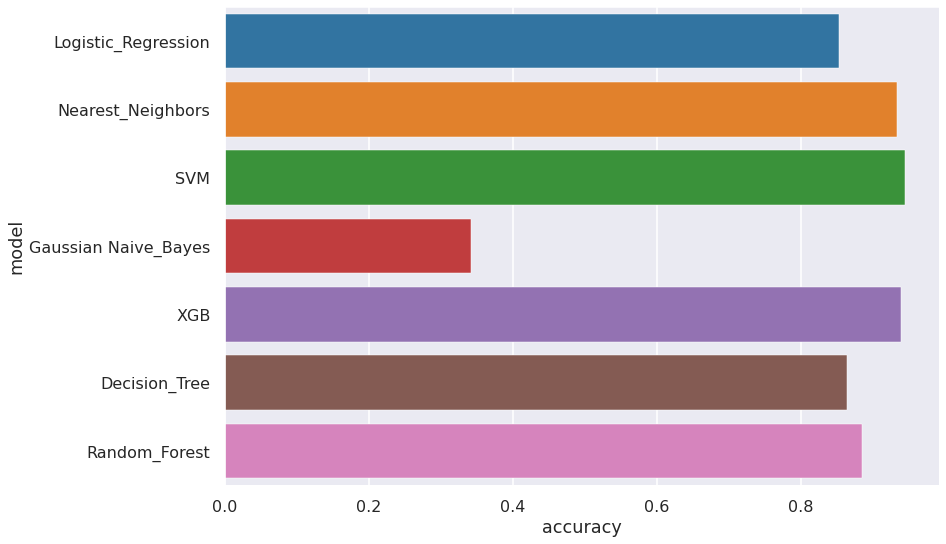

In [ ]:
#sns.set(style="darkgrid")
ax = sns.barplot(y="model", x="accuracy", data=models)

In [ ]:
model = XGBClassifier()
model.fit(scaled_X_sm, y_sm)
fig, ax = plt.subplots(figsize=(15,8))
model.get_booster().feature_names
xgb.plot_importance(model, max_num_features=10, height=0.8, ax=ax)
plt.title("Feature importance for XGB : Top 10")
plt.show()

In [ ]:
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names =scaled_X_sm.columns
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
rf.fit(scaled_X_sm, y_sm)
importances = rf.feature_importances_

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    rf, scaled_X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False,inplace=True)
fi = forest_importances
print(fi)
print(fi[:10])
fig, ax = plt.subplots(figsize=(15,8))
fi[:10].plot.bar()
ax.set_title("Feature importances for random_forest : Top 10")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
svm = SVC(kernel='linear')
svm.fit(scaled_X_sm, y_sm)


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(10, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.title("Feature importance for SVM : Top 10")
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

In [ ]:
plot_coefficients(svm, feature_names)